# Parte 4 - Sección 22: Clustering jerarquico

In [73]:
import pandas as pd

df_2vars = pd.read_csv('Mall_Customers.csv')
df_2vars.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
X_2vars = df_2vars.iloc[:, [3, 4]].values

In [75]:
from sklearn.preprocessing import StandardScaler

scaler_2vars = StandardScaler()
X_2vars = scaler_2vars.fit_transform(X_2vars)

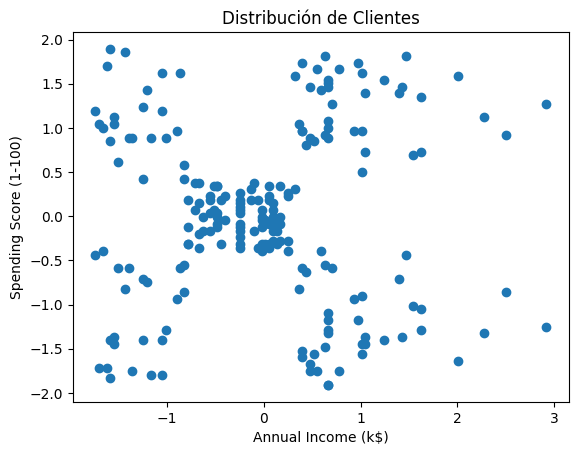

In [76]:
import matplotlib.pyplot as plt

plt.scatter(X_2vars[:, 0], X_2vars[:, 1])
plt.title('Distribución de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

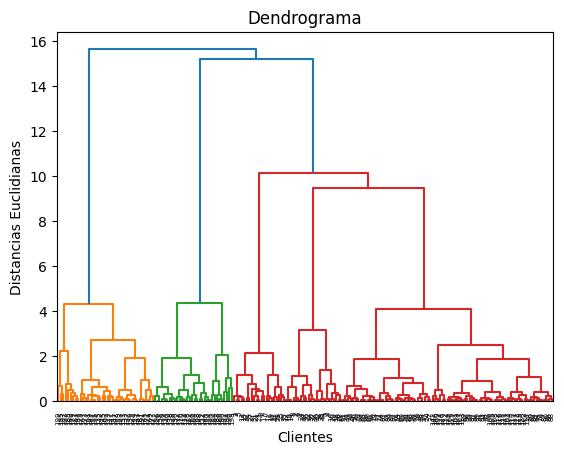

In [77]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X_2vars, method = 'ward'))  # Usamos el método 'ward' para calcular las distancias
plt.title('Dendrograma')  # Título del gráfico
plt.xlabel('Clientes')  # Etiqueta del eje X
plt.ylabel('Distancias Euclidianas')  # Etiqueta del eje Y
plt.show()  # Mostrar el dendrograma

In [78]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc_2vars = hc.fit_predict(X_2vars)

df_2vars['Cluster_2vars'] = y_hc_2vars
df_2vars

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_2vars
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


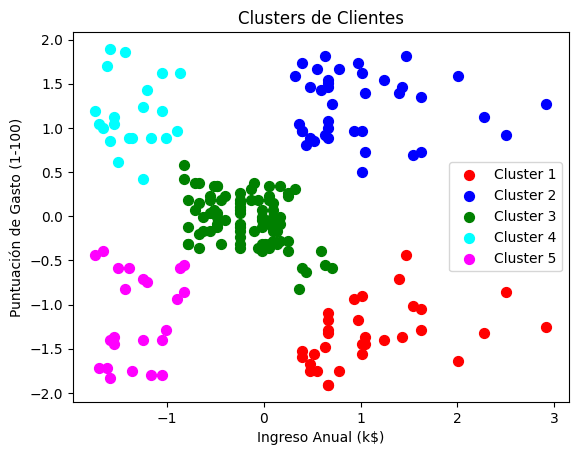

In [79]:
# Visualizando los clusters
plt.scatter(X_2vars[y_hc_2vars == 0, 0], X_2vars[y_hc_2vars == 0, 1], s = 50, c = 'red', label = 'Cluster 1')  # Clientes del Cluster 1
plt.scatter(X_2vars[y_hc_2vars == 1, 0], X_2vars[y_hc_2vars == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')  # Clientes del Cluster 2
plt.scatter(X_2vars[y_hc_2vars == 2, 0], X_2vars[y_hc_2vars == 2, 1], s = 50, c = 'green', label = 'Cluster 3')  # Clientes del Cluster 3
plt.scatter(X_2vars[y_hc_2vars == 3, 0], X_2vars[y_hc_2vars == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')  # Clientes del Cluster 4
plt.scatter(X_2vars[y_hc_2vars == 4, 0], X_2vars[y_hc_2vars == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')  # Clientes del Cluster 5

# Visualizamos el gráfico final con los centroides de los clusters
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.legend()  # Añadimos la leyenda para identificar los clusters
plt.show()  # Mostrar el gráfico
